In [16]:
import pandas as pd #
import numpy as np  #
import pydotplus
import seaborn as sns #
import sklearn
import matplotlib.pyplot as plt 
import matplotlib.image as pltimg
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#

from sklearn.model_selection import train_test_split #

from sklearn import metrics  #

In [17]:
df = pd.read_csv('finaldata.csv')



In [18]:
!pip install pydotplus


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [20]:
df.head(10 )


,RSS,BW,NWCOV,Powe cins,SNR,Handoff
0,-83,1166,8,0.65,28,0
1,-37,1559,57,1.20,45,1
2,-52,1616,26,0.24,40,1
3,-97,1830,49,1.10,44,1
4,-100,1426,57,0.68,48,1
5,-71,1211,13,0.81,25,0
6,-98,53,69,0.02,37,0
7,-73,1985,54,1.85,25,1
8,-33,455,56,1.26,42,1
9,-71,708,29,1.73,32,0


In [21]:
df.describe()

,RSS,BW,NWCOV,Powe cins,SNR,Handoff
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,-60.577000,1006.933000,35.416000,0.999020,37.58200,0.521000
std,23.105799,565.578121,20.712314,0.583147,7.42849,0.499809
min,-100.000000,16.000000,0.000000,0.000000,25.00000,0.000000
25%,-81.000000,542.750000,17.750000,0.480000,31.00000,0.000000
50%,-61.000000,1005.500000,35.000000,1.010000,38.00000,1.000000
75%,-41.750000,1514.250000,54.000000,1.500000,44.00000,1.000000
max,-20.000000,2000.000000,70.000000,2.000000,50.00000,1.000000


In [22]:
x1 = df[['RSS','BW','NWCOV','Powe cins','SNR']]
features=['RSS','BW','NWCOV','Powe cins','SNR']
y1 = df[['Handoff']]

/var/folders/c8/t5fmpjxn3kdc2_c95jkshlx00000gn/T/ipykernel_53774/1145498439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[['SNR']])


<Axes: ylabel='Density'>

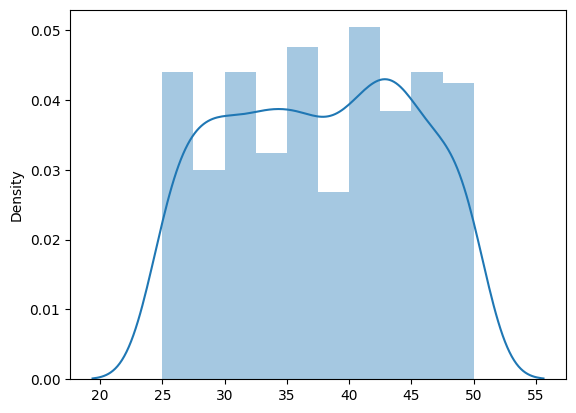

In [23]:
sns.distplot(df[['SNR']]) 

<Axes: >

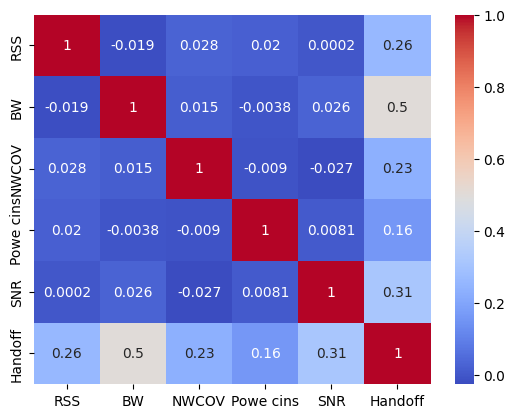

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [25]:
x_train_log,x_test_log,y_train_log,y_test_log=train_test_split(x1,y1,test_size=0.4,random_state=42)
x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(x1,y1,test_size=0.4,random_state=101)
x_train_forest,x_test_forest,y_train_forest,y_test_forest=train_test_split(x1,y1,test_size=0.4,random_state=42)




In [26]:
x_test_log

,RSS,BW,NWCOV,Powe cins,SNR
521,-96,96,24,1.66,36
737,-97,902,3,1.43,32
740,-27,174,66,1.38,33
660,-26,1209,23,0.82,41
411,-42,91,22,0.37,34
...,...,...,...,...,...
56,-51,607,64,1.27,25
405,-32,1685,43,0.62,28
442,-42,403,7,0.92,39
757,-45,973,22,0.55,43


In [27]:
clf = LogisticRegression(random_state=0).fit(x_train_log, y_train_log)
predictions=clf.predict(x_test_log)
cm = metrics.confusion_matrix(y_test_log, predictions)

/Users/abhishekmalla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


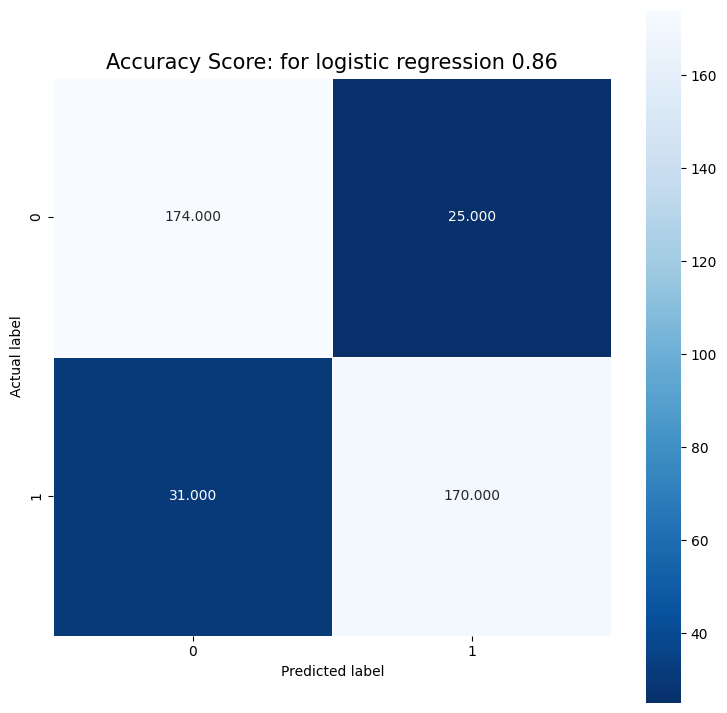

In [28]:
score = clf.score(x_test_log, y_test_log)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: for logistic regression {0}'.format(score)
plt.title(all_sample_title, size = 15);

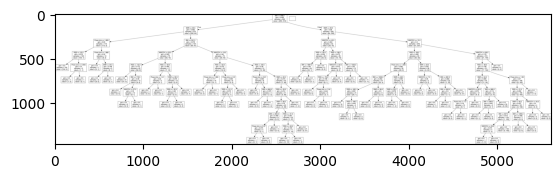

In [29]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train_tree, y_train_tree)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [30]:
predictions_tree=dtree.predict(x_test_tree)

In [31]:
cm = metrics.confusion_matrix(y_test_tree, predictions_tree)
print("decision tree algorithm=>\n", cm)

decision tree algorithm=>
 [[152  37]
 [ 30 181]]


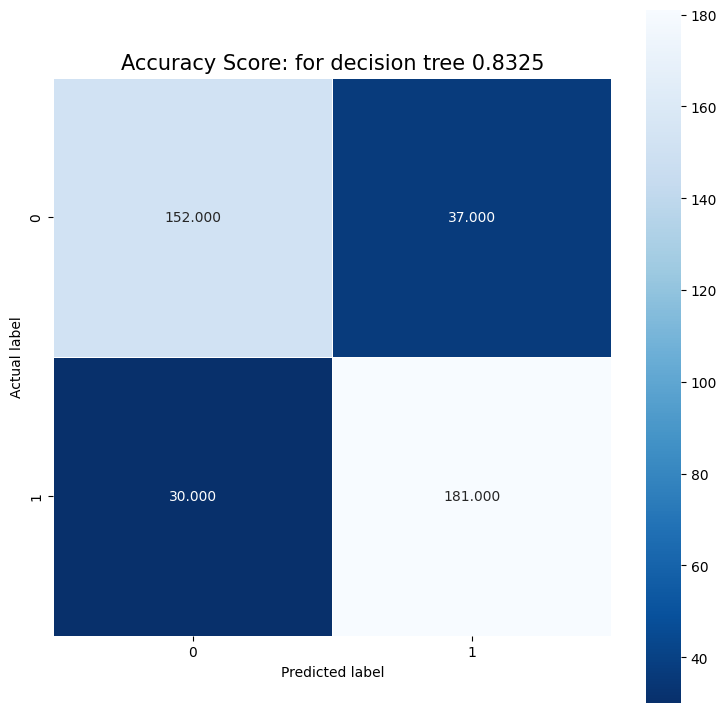

In [32]:

score = dtree.score(x_test_tree, y_test_tree)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: for decision tree {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [ ]:
classifier_rf.fit(x_train_forest, y_train_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
predictions_forest=classifier_rf.predict(x_test_forest)
cm = metrics.confusion_matrix(y_test_forest, predictions_forest)
print("random forest algorithm=>\n", cm)

random forest algorithm=>
 [[179  20]
 [ 31 170]]


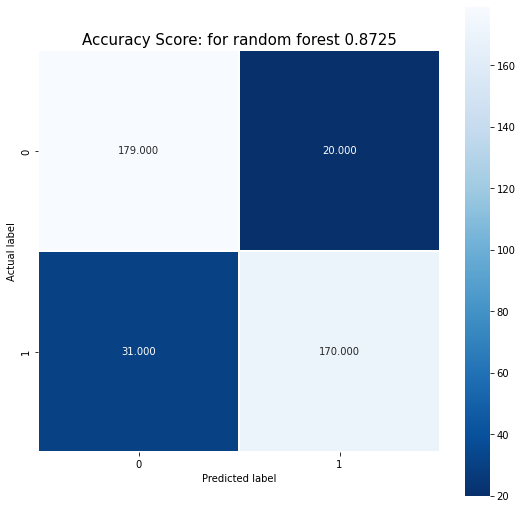

In [ ]:

score = classifier_rf.score(x_test_forest, y_test_forest)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: for random forest {0}'.format(score)
plt.title(all_sample_title, size = 15);